<a href="https://colab.research.google.com/github/hyunwook-lee/drf_quiz_test/blob/master/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from pmdarima.arima import auto_arima
import seaborn as sns

import itertools

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

# 한글 폰트
import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab_data/train.csv", parse_dates=["date_time"])
train.shape

(273, 10)

In [ ]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [ ]:
df= train.copy()
df.drop(['date_time','number_of_rentals'],inplace=True,axis=1)
df.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(df) # df는 2차원 이상의 값이어야 함
df_scaled = scaler.transform(df)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_scaled = pd.DataFrame(data = df_scaled)

In [ ]:
df_scaled.columns=['wind_direction','sky_condition','precipitation_form','wind_speed','humidity','low_temp','high_temp','Precipitation_Probability']

sr1 = pd.Series(train['date_time'], name = 'date_time')
sr2 = pd.Series(train['number_of_rentals'], name = 'number_of_rentals')
train=pd.concat([df_scaled,sr1,sr2],axis=1)

train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,date_time,number_of_rentals
0,0.568659,1.000000,0.000,0.473218,0.783230,0.523314,0.472031,0.365132,2018-04-01,22994
1,0.571747,0.650000,0.000,0.520190,0.702563,0.533719,0.387019,0.237336,2018-04-02,28139
2,0.591398,0.637000,0.000,0.399052,0.781341,0.411014,0.230426,0.232626,2018-04-03,26817
3,0.328032,0.897333,0.425,0.491347,0.734037,0.312850,0.105118,0.529357,2018-04-04,26034
4,0.146870,1.000000,0.723,0.501236,0.764246,0.193236,0.022358,0.771378,2018-04-05,2833


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab_data/test.csv", parse_dates=["date_time"])
test.shape

(91, 9)

In [ ]:
df1= test.copy()
df1.drop(['date_time'],inplace=True,axis=1)

# fit -> transform
#scaler.fit(df1) # df는 2차원 이상의 값이어야 함
df_scaled1 = scaler.transform(df1)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_scaled1 = pd.DataFrame(data = df_scaled1)

df_scaled1.columns=['wind_direction','sky_condition','precipitation_form','wind_speed','humidity','low_temp','high_temp','Precipitation_Probability']

sr3 = pd.Series(test['date_time'], name = 'date_time')
test=pd.concat([df_scaled1,sr3],axis=1)

test.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,date_time
0,0.195733,0.666667,0.000,0.442316,0.054673,0.484048,0.457876,0.223132,2021-04-01
1,0.225532,0.950000,0.000,0.393284,0.336997,0.493865,0.387019,0.346876,2021-04-02
2,0.096842,1.000000,0.565,0.290894,0.818481,0.340483,0.275142,0.643205,2021-04-03
3,-0.048848,0.822000,0.466,0.616811,0.600384,0.211642,0.317649,0.458497,2021-04-04
4,0.342980,0.166667,0.000,0.166255,0.364458,0.257681,0.373587,0.054271,2021-04-05


In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Colab_data/sample_submission.csv")

In [ ]:
submission

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0
5,2021-04-06,0
6,2021-04-07,0
7,2021-04-08,0
8,2021-04-09,0
9,2021-04-10,0


In [ ]:
real_data = pd.read_csv("/content/drive/MyDrive/Colab_data/real_data.csv")

In [ ]:
jh1_data = pd.read_csv("/content/drive/MyDrive/Colab_data/Regression.csv")
jh2_data = pd.read_csv("/content/drive/MyDrive/Colab_data/Linear.csv")
jh3_data = pd.read_csv("/content/drive/MyDrive/Colab_data/C&RT.csv")
jh4_data = pd.read_csv("/content/drive/MyDrive/Colab_data/CHAID.csv")
sj_data = pd.read_csv("/content/drive/MyDrive/Colab_data/선정.csv")

In [ ]:
jh1= jh1_data['number_of_rentals']
jh2= jh2_data['number_of_rentals']
jh3= jh3_data['number_of_rentals']
jh4= jh4_data['number_of_rentals']

In [ ]:
sj_data

In [ ]:
test

In [ ]:
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month
train["day"] = train["date_time"].dt.day
train["dayofweek"] = train["date_time"].dt.dayofweek
train.shape

(273, 14)

In [ ]:
test["year"] = test["date_time"].dt.year
test["month"] = test["date_time"].dt.month
test["day"] = test["date_time"].dt.day
test["dayofweek"] = test["date_time"].dt.dayofweek
test.shape

(91, 13)

In [ ]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,date_time,number_of_rentals,year,month,day,dayofweek
0,0.568659,1.000000,0.000,0.473218,0.783230,0.523314,0.472031,0.365132,2018-04-01,22994,2018,4,1,6
1,0.571747,0.650000,0.000,0.520190,0.702563,0.533719,0.387019,0.237336,2018-04-02,28139,2018,4,2,0
2,0.591398,0.637000,0.000,0.399052,0.781341,0.411014,0.230426,0.232626,2018-04-03,26817,2018,4,3,1
3,0.328032,0.897333,0.425,0.491347,0.734037,0.312850,0.105118,0.529357,2018-04-04,26034,2018,4,4,2
4,0.146870,1.000000,0.723,0.501236,0.764246,0.193236,0.022358,0.771378,2018-04-05,2833,2018,4,5,3


In [ ]:
train.isnull().sum()

wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
date_time                    0
number_of_rentals            0
year                         0
month                        0
day                          0
dayofweek                    0
dtype: int64

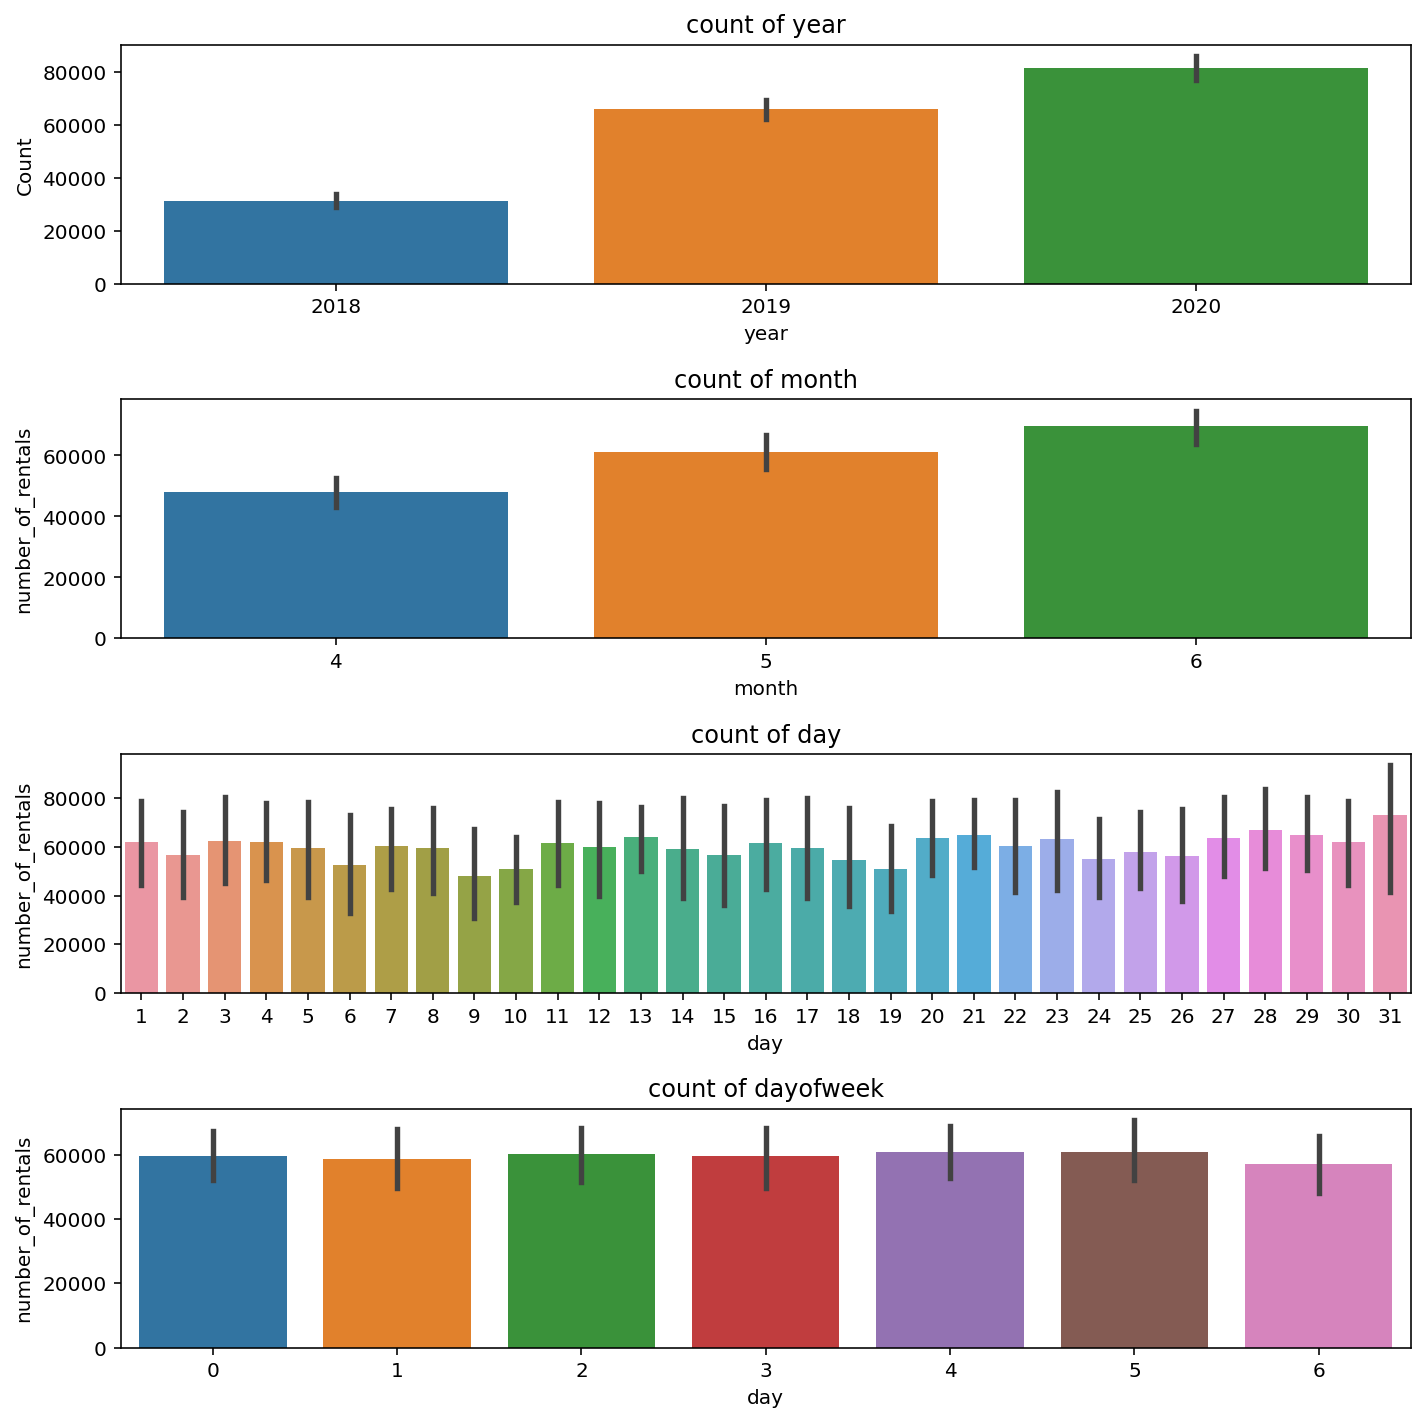

In [ ]:
figure, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(10,10)

sns.barplot(data=train, x="year", y="number_of_rentals", ax=ax1)
sns.barplot(data=train, x="month", y="number_of_rentals", ax=ax2)
sns.barplot(data=train, x="day", y="number_of_rentals", ax=ax3)
sns.barplot(data=train, x="dayofweek", y="number_of_rentals", ax=ax4)

ax1.set(ylabel='Count',title="count of year")
ax2.set(xlabel='month',title="count of month")
ax3.set(xlabel='day', title="count of day")
ax4.set(xlabel='day', title="count of dayofweek")

plt.tight_layout()
plt.show()

In [ ]:
corrMatt = train[['day','month','year',"wind_direction", "sky_condition", "precipitation_form", "wind_speed", "humidity", "low_temp", "high_temp",'Precipitation_Probability','number_of_rentals']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                                    day         month          year  \
day                        1.000000e+00 -5.489761e-18 -5.459514e-18   
month                     -5.489761e-18  1.000000e+00  0.000000e+00   
year                      -5.459514e-18  0.000000e+00  1.000000e+00   
wind_direction            -1.029335e-01 -3.300990e-02  8.915683e-02   
sky_condition              6.939584e-02  6.051376e-02 -1.137155e-01   
precipitation_form         6.067542e-02  3.912342e-02 -3.873091e-02   
wind_speed                -1.288720e-01 -2.497985e-01 -1.767765e-01   
humidity                   2.114200e-01  3.552106e-01 -2.446968e-02   
low_temp                   2.652248e-01  8.781012e-01 -2.202316e-02   
high_temp                  2.249114e-01  8.303056e-01 -6.233169e-03   
Precipitation_Probability  6.325526e-02  5.062654e-02 -9.386428e-02   
number_of_rentals          5.076042e-02  3.200193e-01  7.390113e-01   

                           wind_direction  sky_condition  precipitation_form

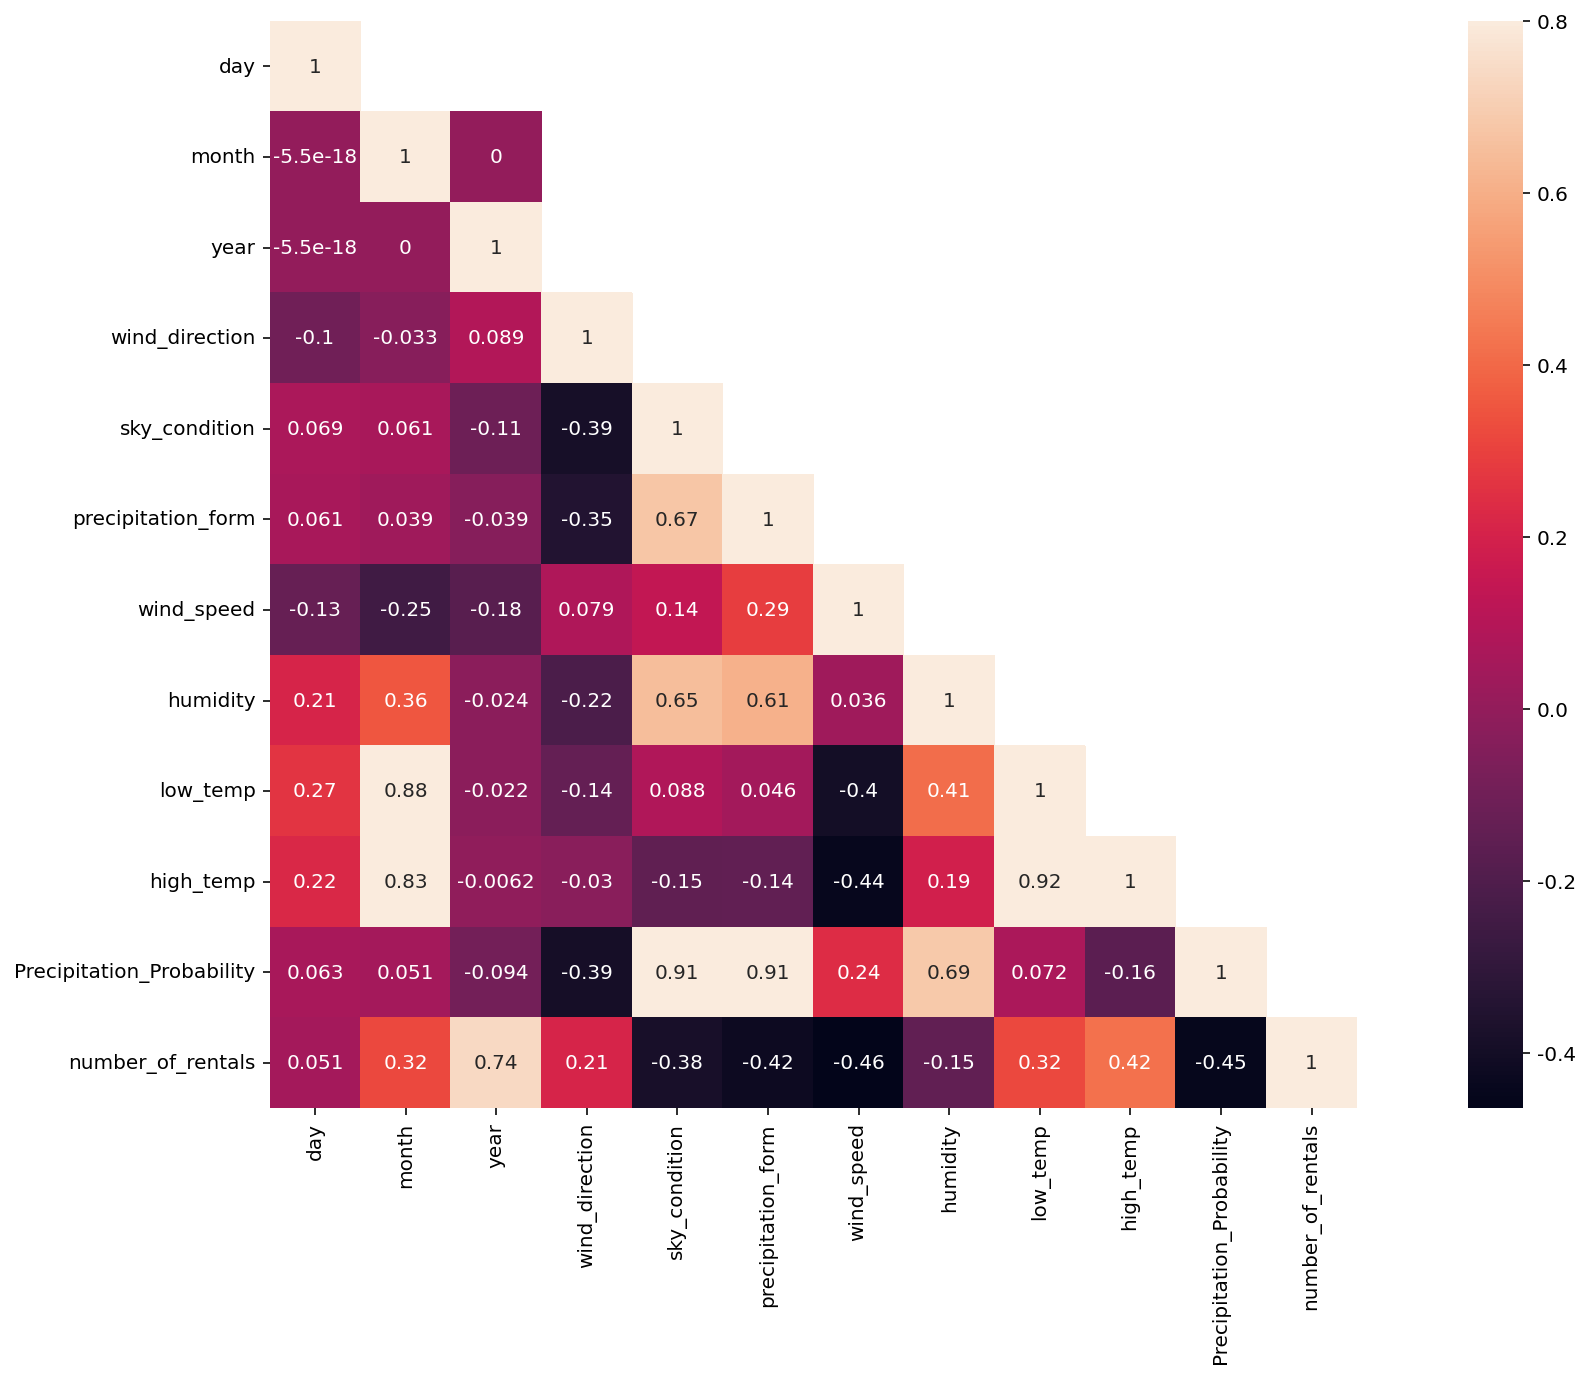

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["dayofweek","month","year"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [ ]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,date_time,number_of_rentals,year,month,day,dayofweek
0,0.568659,1.000000,0.000,0.473218,0.783230,0.523314,0.472031,0.365132,2018-04-01,22994,2018,4,1,6
1,0.571747,0.650000,0.000,0.520190,0.702563,0.533719,0.387019,0.237336,2018-04-02,28139,2018,4,2,0
2,0.591398,0.637000,0.000,0.399052,0.781341,0.411014,0.230426,0.232626,2018-04-03,26817,2018,4,3,1
3,0.328032,0.897333,0.425,0.491347,0.734037,0.312850,0.105118,0.529357,2018-04-04,26034,2018,4,4,2
4,0.146870,1.000000,0.723,0.501236,0.764246,0.193236,0.022358,0.771378,2018-04-05,2833,2018,4,5,3


In [ ]:
feature_names = [ "wind_speed", 
                 "high_temp",'Precipitation_Probability','year',"wind_direction", "humidity", "low_temp","sky_condition", "precipitation_form",'dayofweek','month']
#"wind_direction", "humidity", "low_temp","sky_condition", "precipitation_form",,'dayofweek','month'
feature_names

['wind_speed',
 'high_temp',
 'Precipitation_Probability',
 'year',
 'wind_direction',
 'humidity',
 'low_temp',
 'sky_condition',
 'precipitation_form',
 'dayofweek',
 'month']

In [ ]:
#Train = train.loc[train['date_time'] < '2020-04-01',:]
#val = train.loc[train['date_time'] >= '2020-04-01',:]
#print(Train.shape, val.shape)

In [ ]:
#Train["year"] = Train["date_time"].dt.year
#Train["month"] = Train["date_time"].dt.month
#Train["day"] = Train["date_time"].dt.day
#Train["dayofweek"] = Train["date_time"].dt.dayofweek
#Train.shape

#val["year"] = val["date_time"].dt.year
#val["month"] = val["date_time"].dt.month
#val["day"] = val["date_time"].dt.day
#val["dayofweek"] = val["date_time"].dt.dayofweek
#val.shape

In [ ]:
X_train = train[feature_names]

print(X_train.shape)
X_train

(273, 11)


,wind_speed,high_temp,Precipitation_Probability,year,wind_direction,humidity,low_temp,sky_condition,precipitation_form,dayofweek,month
0,0.473218,0.472031,0.365132,2018,0.568659,0.783230,0.523314,1.000000,0.000,6,4
1,0.520190,0.387019,0.237336,2018,0.571747,0.702563,0.533719,0.650000,0.000,0,4
2,0.399052,0.230426,0.232626,2018,0.591398,0.781341,0.411014,0.637000,0.000,1,4
3,0.491347,0.105118,0.529357,2018,0.328032,0.734037,0.312850,0.897333,0.425,2,4
4,0.501236,0.022358,0.771378,2018,0.146870,0.764246,0.193236,1.000000,0.723,3,4
5,0.614133,0.000000,0.487671,2018,0.753529,0.687763,0.027584,0.822000,0.358,4,4
6,0.838690,0.044716,0.111025,2018,0.876164,0.323321,0.000000,0.304000,0.000,5,4
7,0.641121,0.183457,0.190794,2018,0.543861,0.443563,0.116521,0.468333,0.054,6,4
8,0.341780,0.322154,0.121711,2018,0.408765,0.478378,0.306764,0.333333,0.000,0,4
9,1.000000,0.364660,0.265622,2018,0.432747,0.456224,0.315942,0.639667,0.088,1,4


In [ ]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(91, 11)


,wind_speed,high_temp,Precipitation_Probability,year,wind_direction,humidity,low_temp,sky_condition,precipitation_form,dayofweek,month
0,0.442316,0.457876,0.223132,2021,0.195733,0.054673,0.484048,0.666667,0.000,3,4
1,0.393284,0.387019,0.346876,2021,0.225532,0.336997,0.493865,0.950000,0.000,4,4
2,0.290894,0.275142,0.643205,2021,0.096842,0.818481,0.340483,1.000000,0.565,5,4
3,0.616811,0.317649,0.458497,2021,-0.048848,0.600384,0.211642,0.822000,0.466,6,4
4,0.166255,0.373587,0.054271,2021,0.342980,0.364458,0.257681,0.166667,0.000,0,4


In [ ]:
label_name ='number_of_rentals'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(273,)


0    22994
1    28139
2    26817
3    26034
4     2833
Name: number_of_rentals, dtype: int64

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

max_depth_list = []
model = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1)
model5 = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0)
model200 =RandomForestRegressor(n_estimators=200)
model1000 = RandomForestRegressor(random_state=0,max_depth= 8, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
#modelLR = LinearRegression()

In [ ]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함

model.fit(X_train, y_train)
model5.fit(X_train, y_train)
model200.fit(X_train, y_train)
model1000.fit(X_train,y_train)
#modelLR.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, n_estimators=300,
                      random_state=0)

In [ ]:
"""
from sklearn.metrics import make_scorer,accuracy_score

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer
"""

'\nfrom sklearn.metrics import make_scorer,accuracy_score\n\ndef rmsle(predicted_values, actual_values):\n    # 넘파이로 배열 형태로 바꿔준다.\n    predicted_values = np.array(predicted_values)\n    actual_values = np.array(actual_values)\n    \n    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.\n    log_predict = np.log(predicted_values + 1)\n    log_actual = np.log(actual_values + 1)\n    \n    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.\n    difference = log_predict - log_actual\n    # difference = (log_predict - log_actual) ** 2\n    difference = np.square(difference)\n    \n    # 평균을 낸다.\n    mean_difference = difference.mean()\n    \n    # 다시 루트를 씌운다.\n    score = np.sqrt(mean_difference)\n    \n    return score\n\nrmsle_scorer = make_scorer(rmsle)\nrmsle_scorer\n'

In [ ]:
#%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
#score = score.mean()
# 0에 근접할수록 좋은 데이터
#print("Score= {0:.5f}".format(score))

In [ ]:
# 예측
#predictions = model.predict(X_test)

#print(predictions.shape)
#predictions[0:10]
ypred1 = model.predict(X_test)
ypred2 = model5.predict(X_test)
ypred3 = model200.predict(X_test)
ypred4 = model1000.predict(X_test)
#ypred5 = modelLR.predict(X_train)

In [ ]:
#real_data["number_of_rentals"] = pd.to_numeric(real_data["number_of_rentals"])
real_data['number_of_rentals'].astype(float)
real= real_data['number_of_rentals']

In [ ]:
sj= sj_data['number_of_rentals']

In [ ]:
submission['number_of_rentals'] = ypred1
submission.to_csv('model.csv',index=False)

In [ ]:
submission['number_of_rentals'] = ypred4
submission.to_csv('model1000.csv',index=False)

In [ ]:
#submission['number_of_rentals'] = ypred5
#submission.to_csv('modelLR.csv',index=False)

NameError: ignored

In [ ]:
sj

In [ ]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score
NMAE(real,sj)

0.8418689095816816

In [ ]:
y_val

In [ ]:
ypred1

In [ ]:
model.feature_importances_

array([0.03311549, 0.04441746, 0.11441607, 0.19276287, 0.07656532,
       0.00910796, 0.04834217, 0.48127265])

In [ ]:
model1000.feature_importances_

array([0.02035476, 0.1182205 , 0.1036721 , 0.5928411 , 0.01454141,
       0.0077511 , 0.03619905, 0.01874417, 0.06412341, 0.00839582,
       0.01515658])

In [ ]:
rf =RandomForestRegressor(random_state=0)

params = { 'n_estimators' : [50,100,200,300,400,500],
           'max_depth' : [5,6,8],
           'min_samples_leaf' :[1,3,5],
           'min_samples_split' :[1,2,3,4,5,6,7,8,9,10],
          'criterion':['mae','mse']
            }

grid_cv = GridSearchCV(rf,param_grid=params,cv=k_fold,n_jobs=-1,scoring='neg_mean_absolute_error')
grid_cv.fit(X_train,y_train)

#best_rfr=grid_cv.best_estimator_
#best_rfr.fit(X_train,y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(np.sqrt(grid_cv.best_score_)))

최적 하이퍼 파라미터:  {'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도: nan


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

params = { 'n_estimators' : stats.randint(1,100),
           'max_depth' : stats.randint(1,20),
           'min_samples_leaf' : stats.randint(1,20),
           'min_samples_split' : stats.randint(1,20)
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)
rand_cv = RandomizedSearchCV(rf_clf,param_distributions = params,n_iter=10,random_state=0, cv = k_fold, n_jobs = -1)
rand_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

최적 하이퍼 파라미터:  {'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 89}
최고 예측 정확도: 0.9292
